## Неделя 2. Понедельник

### Линейная алгебра и Numpy. Часть 1

#### 3. Линейная алгебра + numpy в контексте машинного обучения

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

__3.1 Рекомендательные системы__

* У нас есть матрица оценок десяти пользователей по двум фильмам.

In [ ]:
names = np.array(['John', 'Michael', 'David', 'James', 'William', 'Emily', 'Emma',
       'Olivia', 'Sophia', 'Isabella'])
moovie1 = np.array([ 7,  7,  4,  4, 10,  1,  1,  9,  5,  3])
moovie2 = np.array([ 1,  3,  9, 10,  3,  6, 10,  5,  6,  5])

In [ ]:
df = pd.DataFrame(data={'moovie1': moovie1, 'moovie2': moovie2}, index=names)
df

,moovie1,moovie2
John,7,1
Michael,7,3
David,4,9
James,4,10
William,10,3
Emily,1,6
Emma,1,10
Olivia,9,5
Sophia,5,6
Isabella,3,5


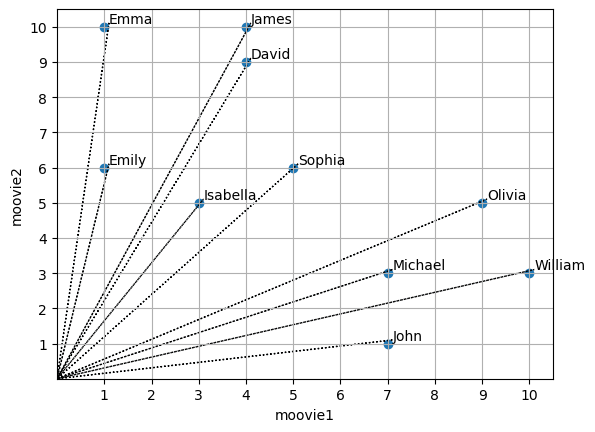

In [ ]:
plt.scatter(df['moovie1'], df['moovie2'])
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(1, 11, 1))
plt.xlim(0, 10.5)
plt.ylim(0, 10.5)
plt.xlabel('moovie1')
plt.ylabel('moovie2')

for i in range(len(df)):
    plt.arrow(0, 0, *(df.iloc[i] + 0.1), length_includes_head=True, linestyle=':')
    plt.text(*(df.iloc[i] + 0.1), names[i])
plt.grid();

1. Найдите для __Michael__ самого ближнего кинолюбителя по косинусному сходству(см.формулу в [лекции](https://github.com/Elbrus-DataScience/ds-phase-1/blob/master/slides/LinAlg_day1.pdf)), то есть имеющего c ним минимальный угол
2. То же самое, что в первом пункте, только по [евклидову расстоянию](https://www.engati.com/glossary/euclidean-distance)

In [ ]:
Michael = np.array([7, 3])
# total_ratings = your_code. Не забудьте Michael убрать из матрицы оценок

In [ ]:
df_new = df[df.index!='Michael']

In [ ]:
df_new

,moovie1,moovie2
John,7,1
David,4,9
James,4,10
William,10,3
Emily,1,6
Emma,1,10
Olivia,9,5
Sophia,5,6
Isabella,3,5


In [ ]:
angle_beetween_two_vectors(Michael, df_new)

array([15.06848816, 42.83892051, 45.        ,  6.49934628, 57.33908728,
       61.09081635,  5.85601359, 26.99583839, 35.83765295])

In [ ]:
min_angle_index = np.argmin(angle_beetween_two_vectors(Michael, df_new)) # Функция из задания 2.4

In [ ]:
print(f'Больше всего по косинусному сходству похож на Michael - {df_new.iloc[min_angle_index].name}')

Больше всего по косинусному сходству похож на Michael - Olivia


In [ ]:
def euclidean_distance(a, X):
    return np.sqrt(np.sum(np.square(a - X), axis=1))

In [ ]:
euclidean_distance(Michael, df_new.to_numpy())

array([2.        , 6.70820393, 7.61577311, 3.        , 6.70820393,
       9.21954446, 2.82842712, 3.60555128, 4.47213595])

In [ ]:
min_eucl_distance_index = np.argmin(euclidean_distance(Michael, df_new.to_numpy()))

In [ ]:
print(
    f'Больше всего по евклидовому расстоянию похож на Michael - {df_new.iloc[min_eucl_distance_index].name}'
)

Больше всего по евклидовому расстоянию похож на Michael - John


__3.2 Image__

* Подгрузите изображение, оно цветное, поэтому имеет формат [RGB](https://media.contented.ru/glossary/rgb/#:~:text=RGB%20%E2%80%94%20%D1%8D%D1%82%D0%BE%20%D0%B0%D0%B4%D0%B0%D0%BF%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F%20%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C,%D0%BF%D0%BE%D0%BB%D1%83%D1%87%D0%B8%D1%82%D1%8C%20%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5%2016%20%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%BE%D0%B2%20%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2.) формат. Каждый пиксель кодируется тремя значениями.

* Постройте subplot из 4 графиков. Где будут - исходное изображение, и изображение только с красным/зеленым/синим каналом (Для этого нужно занулить значения двух других каналов)

In [ ]:
from skimage import io # pip install scikit-image

# Можете выбрать любую картинку из интернета
image_URL = 'https://helpx.adobe.com/content/dam/help/en/photoshop/using/convert-color-image-black-white/jcr_content/main-pars/before_and_after/image-before/Landscape-Color.jpg'

image = io.imread(image_URL)

R_image = image.copy()
G_image = image.copy()
B_image = image.copy()

R_image[:, :, [1, 2]] = 0
G_image[:, :, [0, 2]] = 0
B_image[:, :, [0, 1]] = 0

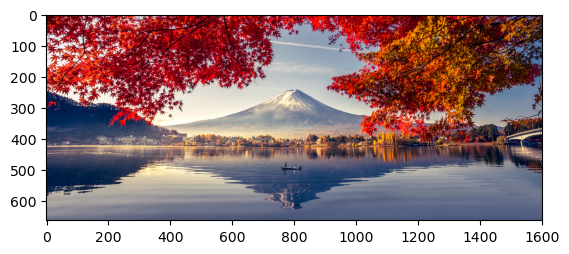

In [ ]:
plt.imshow(image); # Исходное изображение

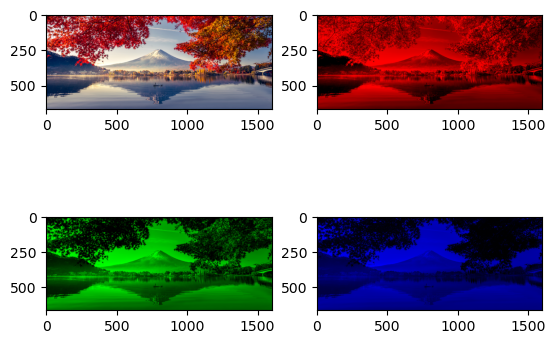

In [ ]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(image)
axes[0, 1].imshow(R_image)
axes[1, 0].imshow(G_image)
axes[1, 1].imshow(B_image)
plt.show()

__3.3 ML matrix multiplication__

* у вас есть датафрейм в котором есть три признака - x1, x2, x3
* Для этих признаков посчитаны веса линейной важности
* Получите линейное предсказание значения с этими весами и сохраните в переменную __y_pred__
* Посчитайте [MeanAbsoluteError(MAE)](https://miro.medium.com/v2/resize:fit:1400/1*DzKFPy5ECU7q--O4IJGiMA.png) между __y_real__ и __y_true__
* Сравни с коллегами свой MAE
* цикл __for__ использовать нельзя
* если вам необходима подсказка, раскомментируйте код ниже и запустите в его в ячейке markdown.

In [ ]:
# $
# \begin{pmatrix}
# x_{11} & x_{12} & x_{13}\\
# x_{21} & x_{22} & x_{23}\\
# x_{31} & x_{32} & x_{33}\\
# ... & ... & ...\\
# x_{n1} & x_{n2} & x_{n3}\\
# \end{pmatrix}
# \cdot
# \begin{pmatrix}
# w_1\\
# w_2\\
# w_3
# \end{pmatrix}
# =
# \begin{pmatrix}
# x_{11} \cdot w_1 + x_{12} \cdot w_2 + x_{13} \cdot w_3\\
# x_{21} \cdot w_1 + x_{22} \cdot w_2 + x_{23} \cdot w_3\\
# x_{31} \cdot w_1 + x_{32} \cdot w_2 + x_{33} \cdot w_3\\
# ... \\
# x_{n1} \cdot w_1 + x_{n2} \cdot w_2 + x_{n3} \cdot w_3\\
# \end{pmatrix}
# $

In [ ]:
pwd

'/Users/anton/Desktop/phase_1_sub'

In [ ]:
df = pd.read_csv('/Users/anton/Desktop/total/Elbrus/Elbrus_repo/fork_repo/ds-phase-1/05-math/aux/LinRegtrain.csv').drop('Unnamed: 0', axis=1).rename(columns={'y': 'y_real'})

w = np.array([12, 5, -14])

In [ ]:
df

,x1,x2,x3,y_real
0,29.440545,16.059377,0.091775,65.757297
1,19.042586,14.126573,1.983495,73.747860
2,26.121936,23.352666,1.729829,67.702758
3,16.911125,21.488393,4.457219,69.643123
4,21.367983,18.653571,2.228492,47.884157
...,...,...,...,...
795,16.849062,19.308053,3.764955,52.828715
796,17.910305,16.282983,5.995191,28.693011
797,23.751540,18.732124,2.413395,74.490344
798,25.763204,27.802949,0.847001,84.540768


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_pred = df[['x1', 'x2', 'x3']]@w

mae = mean_absolute_error(df['y_real'], y_pred)
print(f'Средняя абсолютная ошибка равна - {mae}')

Средняя абсолютная ошибка равна - 229.43242592439276


__4.4 NeuralNet__

* У нас есть архитектура(Изображена на рисунке ниже), которая преобразовывает 5-мерный входной вектор в одномерное число. Необходимо реализовать эту архитектуру(без цикла __for__, используя лишь матричные умножения 😊

* Немножко комметариев.

* 5 входов, каждый из которых далее, после домножения на некоторый вес будет уходить в узел(a1, a2, a3, a4), где их результаты сложатся с другими пришедшими в этот узел значениями. После подобный трюк повторяется, где значения уже агрегируются в один узел, который и будет выходным.

* У вас будет подаваться на вход 100 объектов, каждый имеет 5 координат(матрица 100x5). Необходимо поулчить для этих 100 объектов их 100 выходных значений(матрица 100x1)

* Матрица весов данной архитектуры приведена ниже, как и входные данные.

In [ ]:
M = np.array([[1,2,3], [4,5,6]])

vec = np.array([1, -4, 2])

In [ ]:
M, vec

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([ 1, -4,  2]))

In [ ]:
M@vec

array([-1, -4])

In [ ]:
M.shape, vec.shape

((2, 3), (3,))

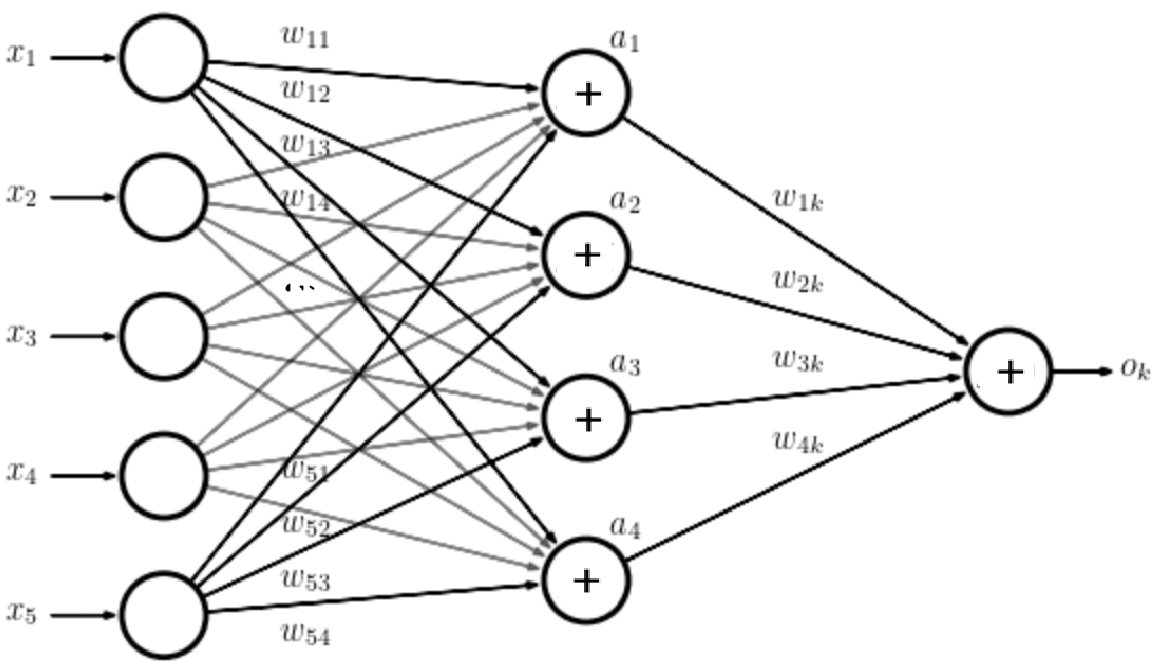

In [ ]:
display(Image(filename='aux/NN_linalg.png', width=600))

In [ ]:
from aux.test_file import true_result # для проверки

In [ ]:
df = pd.read_csv('aux/df_neural_net.csv')

w_the_first_step = np.array(
    [
        [ 1.06959457,  0.39994398,  0.32458136,  2.83954369],
        [ 1.17062841, -1.14434952,  1.22011098,  1.15105695],
        [-1.33775915,  0.68586145, -0.50537923,  1.43315248],
        [ 0.0292406 , -0.25286966,  0.36698391,  1.27478642],
        [-0.01198158, -0.35860788, -0.14267706,  0.7329078 ]
    ]
)
w_the_second_step = np.array(
    [
        [-0.15203543],
        [-2.95253159],
        [-1.40000615],
        [-1.32788034]
    ]
)

In [ ]:
result = (df@w_the_first_step@w_the_second_step).to_numpy().ravel()

In [ ]:
def check_result(my_result, true_result):
    return list(np.round(my_result, 3)) == list(np.round(true_result, 3))

In [ ]:
assert check_result(result, true_result), 'Ответ неверный! Поищи ошибку:)'

* Если ответ сошелся, поздравляю). Эта простейшая нейронная сеть, которая могла бы предсказывать по 5 входным параметрам одно значение, например уровень спроса в магазине и еще миллион примеров:)

#### 4 Линейная алгебра с помощью `numpy`

1. Задай приведенные матрицы и вычисли их ранг. Соответствующая функция расположена в `numpy.linalg`

❓Что такое ранг матрицы? О чем его значение говорит нам?

> ответ тут

2.
$$
\begin{pmatrix}
2 & -1 & 3 & -2 & 4 \\
4 & -2 & 5 & 1 & 7 \\
2 & -1 & 1 & 8 & 2
\end{pmatrix}
$$

In [ ]:
rank = # np.linalg.matrix_rank
print(f'Matrix rank is {rank}')

3.
$$
\begin{pmatrix}
4 & -7 & -2 & 1  \\
-1 & 3 & 3 & -4 \\
-3 & 5 & 1 & 0 \\
-2 & 3 & 0 & 1 \\
1 & -2 & -1 & 1
\end{pmatrix}
$$


In [ ]:
rank = pass
print(f'Matrix rank is {rank}')

4.
$$
\begin{pmatrix}
1 & -2 & 3 & 5 \\
10 & 2 & -1 & 3 \\
8 & 6 & -7 & -7
\end{pmatrix}
$$

In [ ]:
rank = pass
print(f'Matrix rank is {rank}')

5. Вычисли обратную матрицу для приведенных ниже. Соответствующая функция есть в `numpy.linalg`

$$
\begin{pmatrix}
1 & 2 & -1\\
3 & 0 & 2 \\
4 & -2 & 5
\end{pmatrix}
$$

In [ ]:
inv_m = pass #np.linalg.env
print(f'Inverse matrix is {inv_m}')

6.
$$
\begin{pmatrix}
2 & 4 & 3 \\
3 & 2 & 5 \\
5 & 6 & 8
\end{pmatrix}
$$

In [ ]:
inv_m = pass
print(f'Inverse matrix is {inv_m}')

7.
$$
\begin{pmatrix}
1 & 2 & 0 \\
0 & 3 & 1 \\
0 & 1 & 2
\end{pmatrix}
$$

In [ ]:
inv_m = pass
print(f'Inverse matrix is {inv_m}')

8. Найди определитель матриц с помщью [numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html)

❓ Какой вывод мы можем сделать, если определитель матрицы равен нулю?

Есть линейно зависимые либо строки, либо столбцы. В данных присутствует мультиколлинеарность?

9.
$$
\begin{pmatrix}
2 & -5 \\
4 & 3
\end{pmatrix}
$$

In [ ]:
det_m = pass # np.linalg.det
print(f'det(m) = {det_m}')

10.
$$
\begin{pmatrix}
2 & 9 \\
0 & -1
\end{pmatrix}
$$

In [ ]:
det_m = pass
print(f'det(m) = {det_m}')

11.
$$
\begin{pmatrix}
0 & 1\\
0 & 2
\end{pmatrix}
$$

In [ ]:
det_m = pass
print(f'det(m) = {det_m}')

12.

$$
\begin{pmatrix}
-4 & 0 & 5 \\
1 & 2 & -3 \\
-1 & 3 & 4
\end{pmatrix}
$$

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__.

1. Перейди в командной строке в папку, в которой расположен этот нотбук.
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "linear algebra tasks completed"`
4. Выполни команду `git push`

Выполни команду в ячейке ниже `!git status`

In [ ]:
# code